In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


##### Importamos el excel en un DataFrame, vemos la informacion, las primeras filas y si hay valores nulos

In [3]:
df = pd.read_excel("../Datathon/E-Commerce_train.xlsx", index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


In [5]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


##### Observamos cuantos casos hay de entregas a tiempo y cuantos no

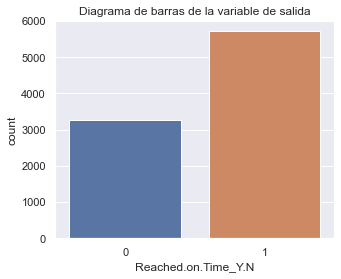

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Reached.on.Time_Y.N', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 12)
plt.show()
pd.value_counts(df['Reached.on.Time_Y.N'], sort = True)

##### Hecemos un balanceo del dataset

##### Vemos la distribucion de las variables de entrada

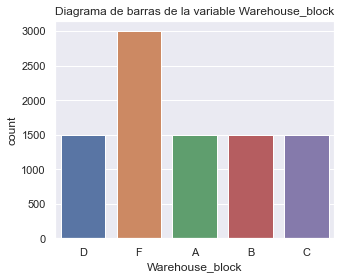

D    1500
F    2999
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Warehouse_block' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Warehouse_block', fontsize = 12)
plt.show()
pd.value_counts(df['Warehouse_block'], sort = False)

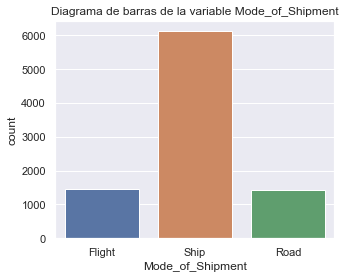

Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Mode_of_Shipment' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Mode_of_Shipment', fontsize = 12)
plt.show()
pd.value_counts(df['Mode_of_Shipment'], sort = True)

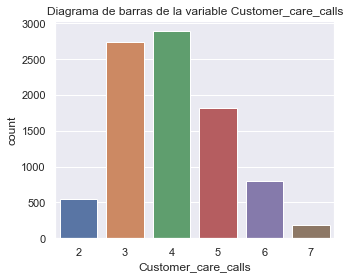

4    2892
3    2743
5    1820
6     803
2     554
7     187
Name: Customer_care_calls, dtype: int64

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Customer_care_calls' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Customer_care_calls', fontsize = 12)
plt.show()
pd.value_counts(df['Customer_care_calls'], sort = True)


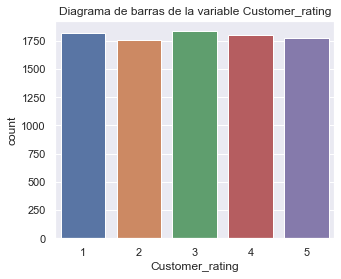

3    1836
1    1823
4    1802
5    1779
2    1759
Name: Customer_rating, dtype: int64

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Customer_rating' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Customer_rating', fontsize = 12)
plt.show()
pd.value_counts(df['Customer_rating'], sort = True)

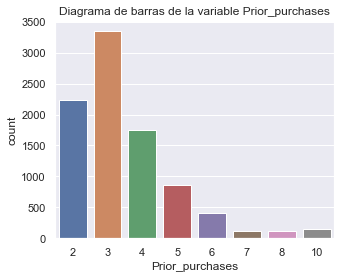

3     3347
2     2239
4     1752
5      863
6      402
10     152
7      126
8      118
Name: Prior_purchases, dtype: int64

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Prior_purchases' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Prior_purchases', fontsize = 12)
plt.show()
pd.value_counts(df['Prior_purchases'], sort = True)

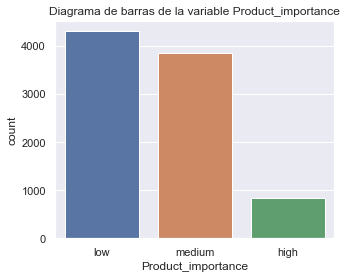

low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Product_importance' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Product_importance', fontsize = 12)
plt.show()
pd.value_counts(df['Product_importance'], sort = True)

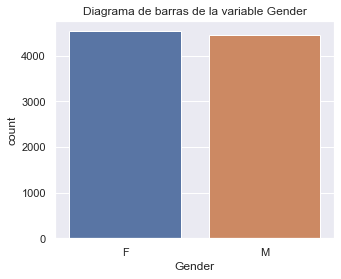

F    4540
M    4459
Name: Gender, dtype: int64

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Gender' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable Gender', fontsize = 12)
plt.show()
pd.value_counts(df['Gender'], sort = True)

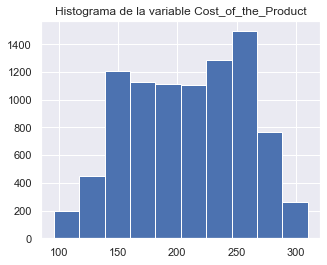

(245.8, 267.2]     1493
(224.4, 245.8]     1286
(138.8, 160.2]     1209
(181.6, 203.0]     1165
(160.2, 181.6]     1124
(203.0, 224.4]     1052
(267.2, 288.6]      764
(117.4, 138.8]      452
(288.6, 310.0]      259
(95.785, 117.4]     195
Name: Cost_of_the_Product, dtype: int64

In [16]:
plt.figure(figsize = (5,4))
plt.hist(df['Cost_of_the_Product'],bins=10)
plt.title('Histograma de la variable Cost_of_the_Product', fontsize = 12)
plt.show()
pd.value_counts(df['Cost_of_the_Product'], sort = True, bins = 10)

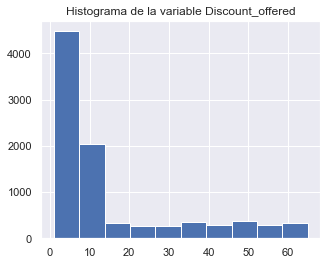

(0.935, 7.4]    4482
(7.4, 13.8]     2032
(45.8, 52.2]     373
(58.6, 65.0]     337
(13.8, 20.2]     334
(26.6, 33.0]     310
(33.0, 39.4]     295
(52.2, 58.6]     289
(39.4, 45.8]     281
(20.2, 26.6]     266
Name: Discount_offered, dtype: int64

In [17]:
plt.figure(figsize = (5,4))
plt.hist(df['Discount_offered'],bins=10)
plt.title('Histograma de la variable Discount_offered', fontsize = 12)
plt.show()
pd.value_counts(df['Discount_offered'], sort = True, bins = 10)

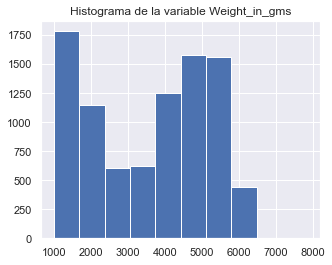

(994.154, 1685.5]    1783
(4423.5, 5108.0]     1578
(5108.0, 5792.5]     1559
(3739.0, 4423.5]     1254
(1685.5, 2370.0]     1150
(3054.5, 3739.0]      624
(2370.0, 3054.5]      602
(5792.5, 6477.0]      443
(7161.5, 7846.0]        5
(6477.0, 7161.5]        1
Name: Weight_in_gms, dtype: int64

In [18]:
plt.figure(figsize = (5,4))
plt.hist(df['Weight_in_gms'],bins=10)
plt.title('Histograma de la variable Weight_in_gms', fontsize = 12)
plt.show()
pd.value_counts(df['Weight_in_gms'], sort = True, bins = 10)

##### Creamos un nuevo dataframe donde se haran las modificaciones

In [19]:
df1 = df.copy()

##### Escalado/normalización
* Cost_of_the_Product
* Discount_offered
* Weight_in_gms

In [20]:
from sklearn.preprocessing import StandardScaler # Impotamos para estándarizar los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1

In [21]:
scaler = StandardScaler()
scaler.fit(df1[['Discount_offered']])
df1['Discount_offered'] = scaler.transform(df1[['Discount_offered']])

In [22]:
scaler = StandardScaler()
scaler.fit(df1[['Discount_offered']])
df1['Discount_offered'] = scaler.transform(df1[['Discount_offered']])

In [23]:
scaler = StandardScaler()
scaler.fit(df1[['Weight_in_gms']])
df1['Weight_in_gms'] = scaler.transform(df1[['Weight_in_gms']])

##### Codificación de variables categóricas
* Warehouse_block: variable categorica nominal - One Hot Encoder
* Mode_of_Shipment: variable categorica nominal - One Hot Encoder
* Product_importance: variable categorica ordinal - Ordinal Encoder
* Gender: variable categorica nominal - One Hot Encoder

In [24]:
from sklearn import preprocessing # Importamos para codificar variables categoricas
# label_encoder = preprocessing.LabelEncoder()
# one_hot_encoder = preprocessing.OneHotEncoder()

In [25]:
# Codificación de variable categorica nominal Warehouse_block
dfWB = pd.get_dummies(df.Warehouse_block, prefix='Warehouse_block', dtype="int64")

In [26]:
# Codificación de variable categorica nominal Mode_of_Shipment
dfMS = pd.get_dummies(df.Mode_of_Shipment, prefix='Mode_of_Shipment', dtype="int64")

In [27]:
# Codificación de variable categorica ordinal Product_importance
ordinal_encoder = preprocessing.OrdinalEncoder(categories =[["low", "medium", "high"]], dtype="int64")
ordinal_encoder.fit(df1[["Product_importance"]])
df1["Product_importance-encoded"] = ordinal_encoder.transform(df1[["Product_importance"]])

In [28]:
# Reemplazamos la columna "Product_importance" (con variable categorica ordinal) por la "Product_importance-encoded" (con variable nominal)
col = df1.pop('Product_importance-encoded')
df1.insert(loc= 6 , column= 'Product_importance-encoded', value= col)
df1.drop(columns= ['Product_importance'],inplace=True)

In [29]:
# Reemplazamos la columna Warehouse_block por Warehouse_block_A	Warehouse_block_B	Warehouse_block_C	Warehouse_block_D	Warehouse_block_F
df1 = pd.concat([df1, dfWB, dfMS], axis=1) # Concatenamos el df1 con los creados para codificar las variables categoricas en Warehouse_block y Mode_of_Shipment
df1.drop(columns= ['Warehouse_block', 'Mode_of_Shipment'],inplace=True) # Eliminamos las columnas Warehouse_block y Mode_of_Shipment con variables categoricas

In [30]:
#Reordenamos las columnas
df1 = pd.DataFrame.reindex(df1,columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
                                        'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
                                        'Customer_care_calls', 
                                        'Customer_rating',
                                        'Cost_of_the_Product', 
                                        'Prior_purchases', 
                                        'Product_importance-encoded', 
                                        'Gender',
                                        'Discount_offered', 
                                        'Weight_in_gms', 
                                        'Reached.on.Time_Y.N'])

##### Hacemos un pairplot y mapa de calor para ver la correlación entre las variables

In [31]:
df2 = df1.drop(columns=['Gender'])

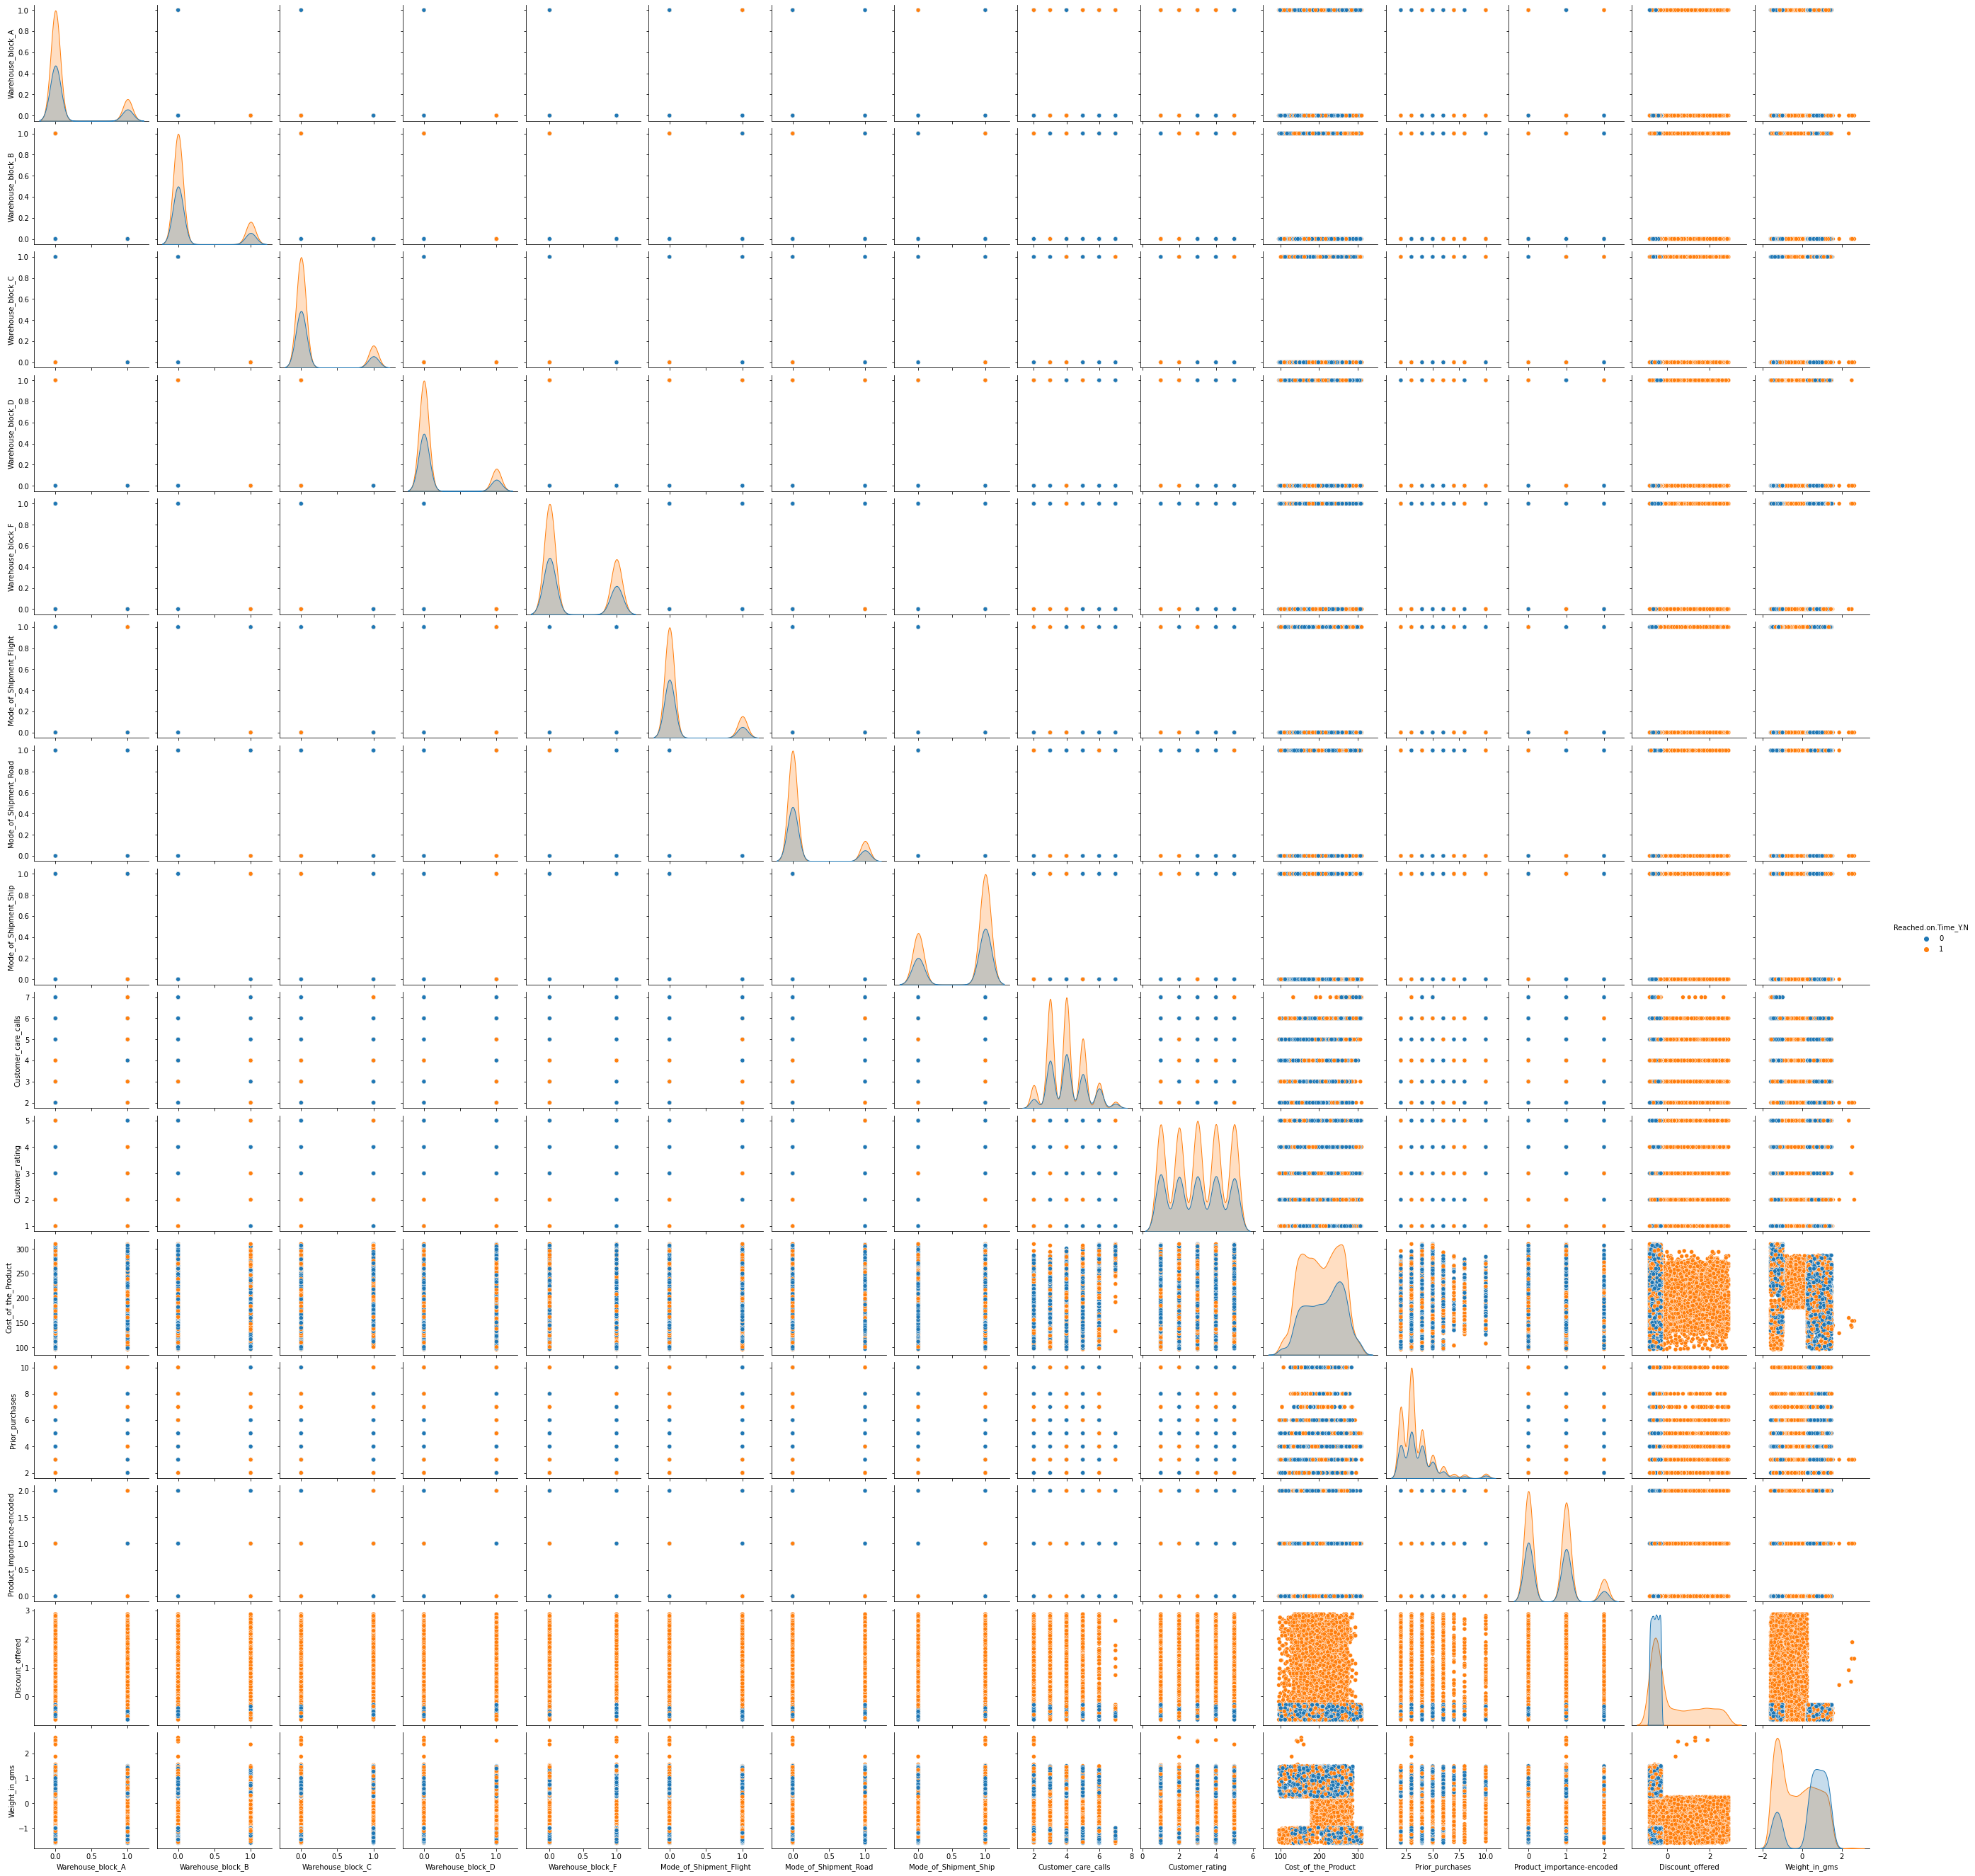

In [33]:
sns.pairplot(df2, hue = 'Reached.on.Time_Y.N')
plt.show()

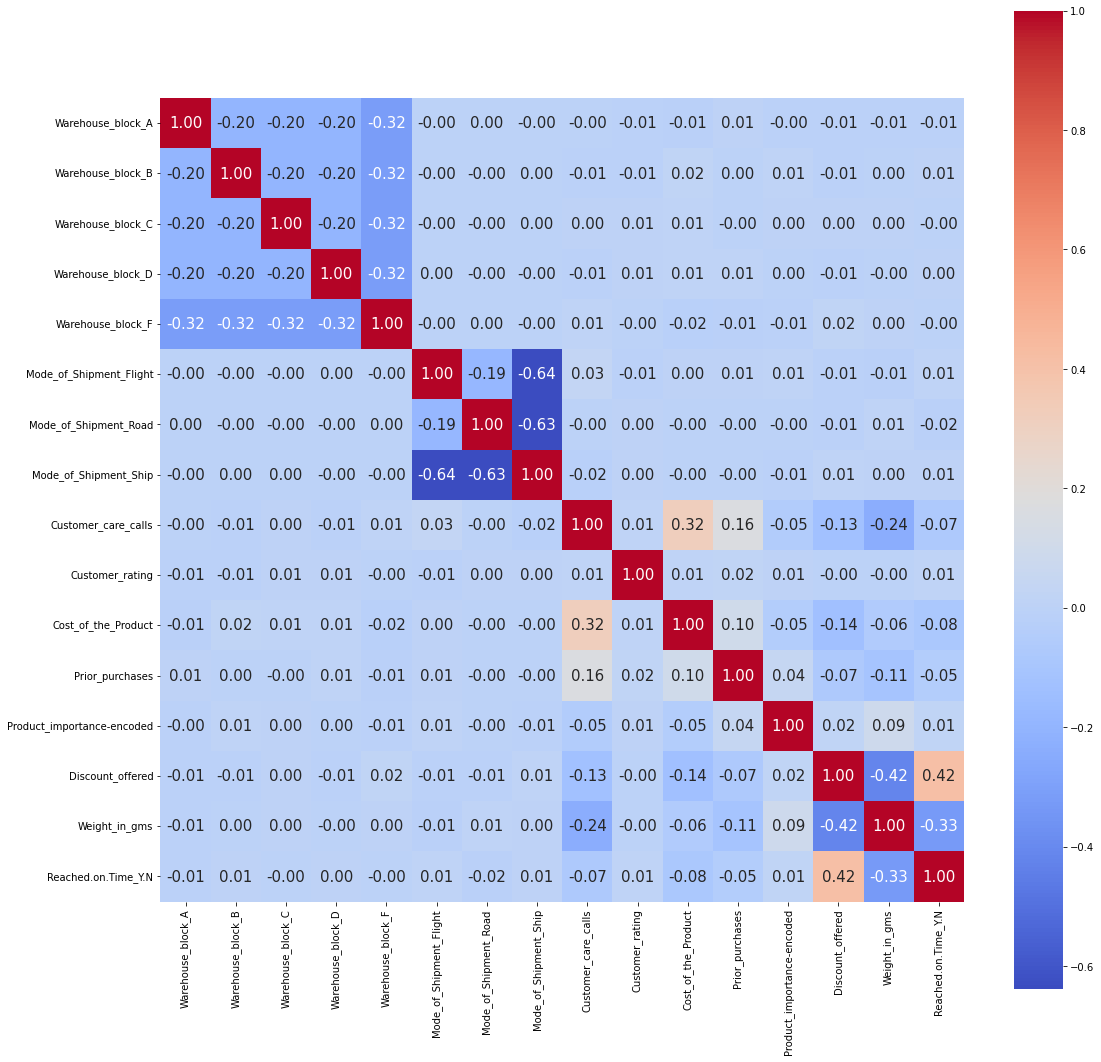

In [34]:
corr = df2.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df2.columns, 
           yticklabels= df2.columns,
           cmap= 'coolwarm'
           )
plt.show()

In [35]:
df3 = df.drop(columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])

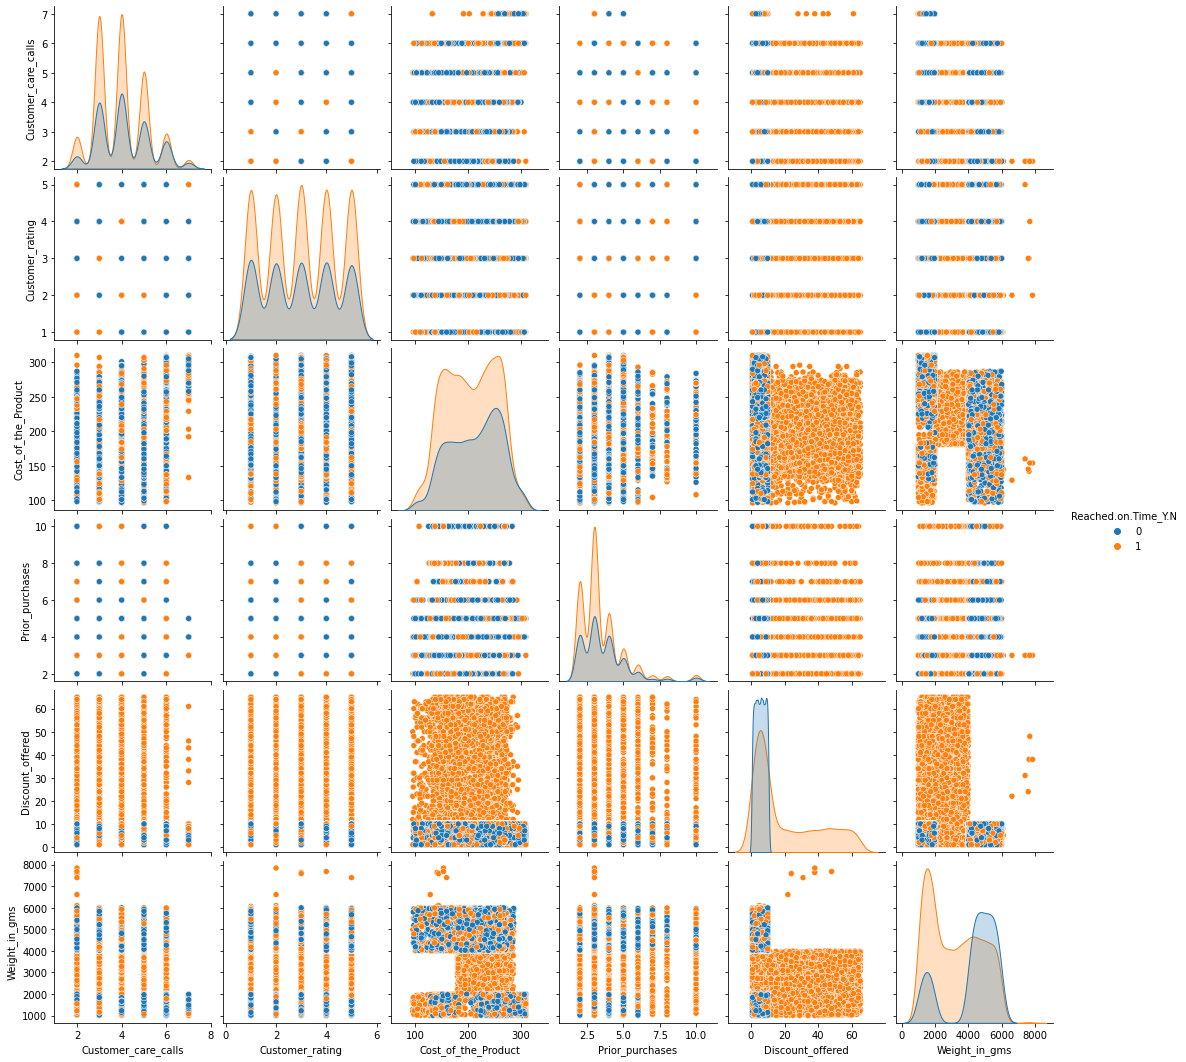

In [36]:
sns.pairplot(df3, hue = 'Reached.on.Time_Y.N')
plt.show()

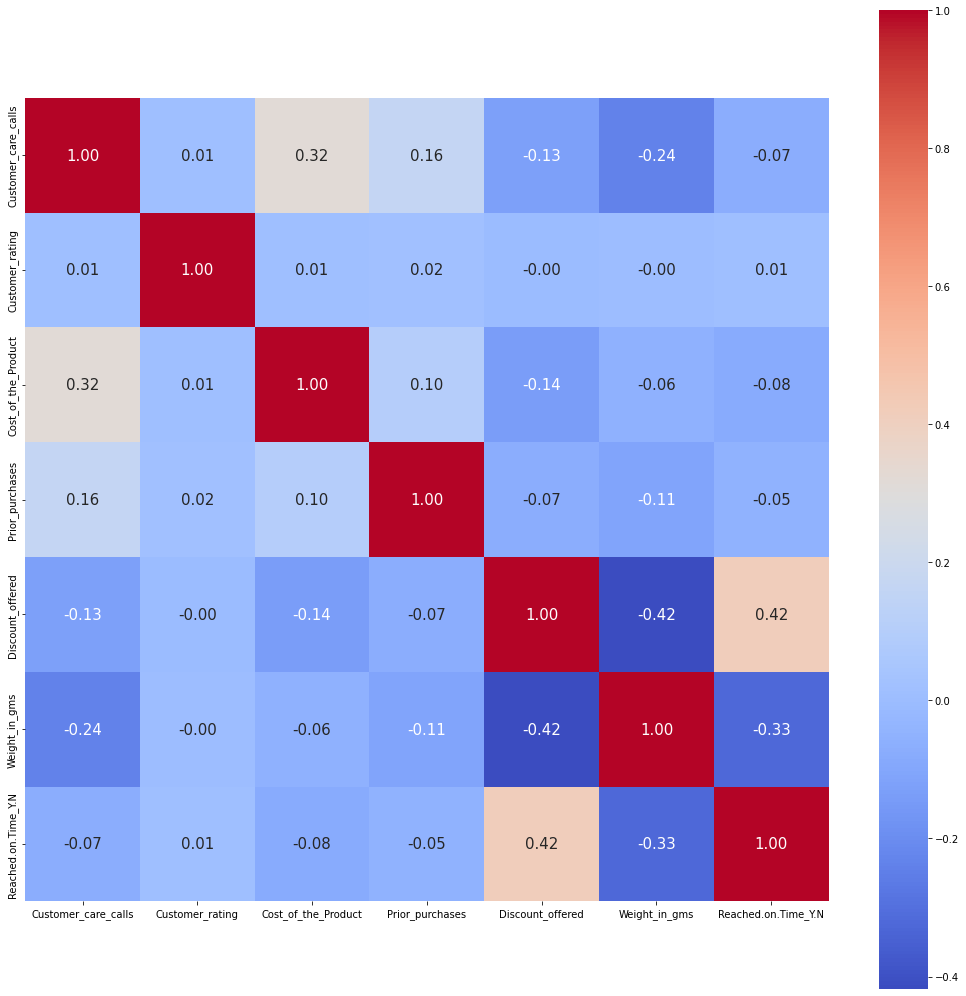

In [63]:
corr = df3.corr(method='pearson')
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df3.columns, 
           yticklabels= df3.columns,
           cmap= 'coolwarm'
           )
plt.show()

##### Definimos nuestras etiquetas y features

In [32]:
#columnas_entrenamiento = ['Discount_offered', 'Weight_in_gms','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases']
columnas_entrenamiento = ['Discount_offered', 'Weight_in_gms','Customer_care_calls','Cost_of_the_Product', 'Prior_purchases']
X = df2[columnas_entrenamiento]
y = df2['Reached.on.Time_Y.N']

##### Separación en sets de entrenamiento y prueba

In [33]:
from sklearn.model_selection import train_test_split #Importamos train_test_split para dividir los datos en datos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=879)

##### Combinamos resampling con Smote-Tomek para balancear el set
###### consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset

In [34]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [39]:
os_us = SMOTETomek(sampling_strategy=1)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 3972, 0: 2327})
Distribution after resampling Counter({1: 3498, 0: 3498})


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix            #Importamos confusion_matrix para calcular la matriz de confusion
from sklearn.metrics import classification_report

In [41]:
from IPython.display import clear_output

###### Analizamos profundidad optima del arbol de decision

In [42]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X_train_res, y_train_res, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


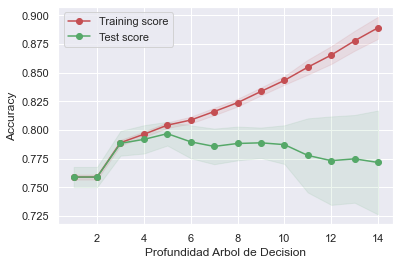

In [43]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

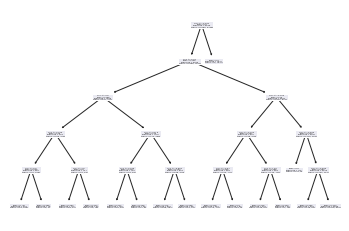

In [101]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 879) # Instanciamos un objeto de la clase DecisionTreeClassifier

tree.plot_tree(clf.fit(X_train_res, y_train_res))
plt.show()

In [103]:
# Predecimos sobre nuestro set de testeo

y_pred = clf.predict(X_test)

In [80]:
#definimos funciona para mostrar los resultados
#LABELS= ["A tiempo", "Demorado"]
LABELS= ["Demorado", "A tiempo"]
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

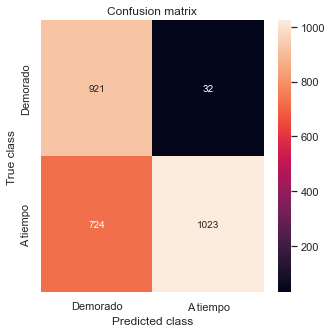

              precision    recall  f1-score   support

           0       0.56      0.97      0.71       953
           1       0.97      0.59      0.73      1747

    accuracy                           0.72      2700
   macro avg       0.76      0.78      0.72      2700
weighted avg       0.83      0.72      0.72      2700



In [105]:
mostrar_resultados(y_test, y_pred)

##### Importamos el excel sobre el cual hay que realizar las predicciones

In [82]:
dfPrueba = pd.read_excel("../Datathon/E-Commerce_test.xlsx", index_col=0)

In [83]:
dfPrueba1 = dfPrueba.copy()

In [84]:
# Estandarizamos
scaler = StandardScaler()
scaler.fit(dfPrueba1[['Discount_offered']])
dfPrueba1['Discount_offered'] = scaler.transform(dfPrueba1[['Discount_offered']])

scaler.fit(df1[['Discount_offered']])
dfPrueba1['Discount_offered'] = scaler.transform(dfPrueba1[['Discount_offered']])

scaler.fit(df1[['Weight_in_gms']])
dfPrueba1['Weight_in_gms'] = scaler.transform(dfPrueba1[['Weight_in_gms']])

In [85]:
# Predecimos sobre el set con los rdos a enviar
X_test_Prueba = dfPrueba1[columnas_entrenamiento]
y_pred_Prueba = clf.predict(X_test_Prueba)

In [86]:
predicciones = pd.DataFrame(y_pred_Prueba)
predicciones.columns = ['pred']
predicciones.to_csv("maxip86.csv", index=False)